# No-show Medical Appointments
### Why do 30% of patients miss their scheduled appointments?


This notebook analyses data collected from 100k medical appointments in Brazil and focuses on the question of whether or not patients show up for their appointment. It shows some basic visualisations and relationships between multiple variables involved data cleaning, performing EDA and drawing conclusions from the data.

Original dataset can be found <a href='{https://www.kaggle.com/joniarroba/noshowappointments/data}'>here</a>

***

## Below Are The Columns In The Dataset And What They Mean

__PatientId__ = ID of the patient<br>
__AppointmentID__ = ID of the appointment<br>
__Gender__ = Gender of patient<br>
__ScheduledDay__ = The day which appointment was scheduled<br>
__AppointmentDay__ = The day which appintment planned to occur<br>
__Age__ = Age of the patient<br>
__Neighbourhood__ = The place where hospital located<br>
__Scholarship__ = If the patient has scholarship or not, That is 1 for True and 0 for False<br>
__Hipertension__ = If the patient has Hipertension or not, That is 1 for True and 0 for False<br>
__Diabetes__ = If the patient has Diabetes or not, That is 1 for True and 0 for False<br>
__Alcoholism__ = If the patient has Alcoholism or not, That is 1 for True and 0 for False<br>
__Handcap__ = If the patient has Handcap or not. That is 1 for True and 0 for False<br>
__SMS_received__ = If the patient received an SMS for the appointment<br>
__No-show__ = no show information:
    1. "Yes" means patient did not come to the appointment,
    2. "No" means patient came to appointment.

## Questions to Be Investigated with This Dataset

1) Who visits the doctor more often?<br>
2) What is the proportion of male & female?<br>
3) Male vs female age and its effect on showing?<br>
4) What is the patient age distribution for no-shows versus shows?<br>
5) What is the proportion of missing the appointment whether the patient is male or female?<br>
6) What is the relationship between no-show and diabetes?<br>
7) What is the relationship between no-show and each of scholarship, handicap, hipertension and alcoholism respectively?<br>
8) What is the relationship between neighbourhoods and the number of shows?<br>
9) Which neighbourhoods have the highest number of shows?<br>
10) In which day the patients visit their doctors most frequently?<br>
11) Is there specific weekday when most patients miss their appointments?<br>
12) Do men and women visit the doctor on the same days?<br>
13) What is the proportion of patients who has received familia scholarship?<br>
14) Based on neighbourhood and scholarship, how showing-up is affected?<br>
15) Which factors can help to predict the showing up of a patient?<br>
16) How to predict whether or not a patient will attend an appointment?<br>

***

# Load Libraries

In [3]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import time
import datetime as dt
from datetime import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics, preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report, accuracy_score, f1_score

In [5]:
sns.set(style='darkgrid')
sns.set_palette('deep')

***

# Data Wrangling

In [6]:
# read the dataset and print out a few lines
df = pd.read_csv('KaggleV2-May-2016.csv')

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# check if any missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

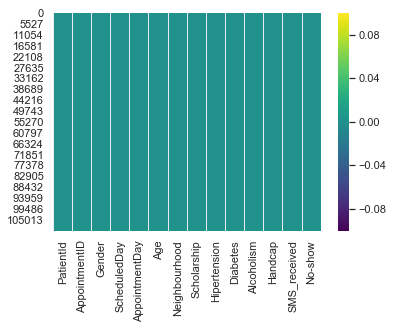

In [9]:
sns.heatmap(df.isnull(), cmap='viridis')

So there is no any NaN anywhere in the data

In [10]:
# check for doublications
df.duplicated().any()

False

That's great! The dataset has zero duplicates and zero null values.

***

# Data Cleaning

In [11]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

I do admit that it is possible to live 100 years but I would like to keep the age as real as possible so any ages more than 95 will be removed..

In [12]:
# clean Age
df = df[(df['Age'] > 0) & (df['Age'] < 95)]

In [13]:
# clean AppointmentDay
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x : x.replace('T00:00:00Z', ''))
df['AppointmentDay'] = pd.to_datetime(df['ScheduledDay'])

In [14]:
# extract days & months from the appointments
df['AppointmentDays'] = df['AppointmentDay'].apply(lambda x : dt.datetime.strftime(x, '%A'))
df['AppointmentMonths'] = df['AppointmentDay'].apply(lambda x : dt.datetime.strftime(x, '%B'))

***

# Exploratory Data Analysis

In [15]:
# summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069170e+05,1.069170e+05,106917.000000,106917.000000,106917.00000,106917.000000,106917.000000,106917.000000,106917.000000
mean,1.472528e+14,5.675433e+06,38.277150,0.101097,0.20355,0.074198,0.031426,0.022831,0.323372
std,2.557886e+14,7.131281e+04,22.421586,0.301459,0.40264,0.262094,0.174468,0.163648,0.467766
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.173166e+12,5.640488e+06,19.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.169497e+13,5.680736e+06,38.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,9.432679e+13,5.725621e+06,56.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,94.000000,1.000000,1.00000,1.000000,1.000000,4.000000,1.000000


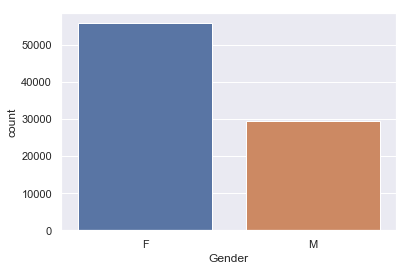

In [16]:
# who visits the doctor more often?
visits = df[df['No-show'] == 'No']
sns.countplot(x='Gender', data=visits)

In [14]:
# what is the proportion of male & female?
df['Gender'].value_counts(normalize = True)

F    0.655303
M    0.344697
Name: Gender, dtype: float64

(-1.1081895929596146,
 1.1003899806171245,
 -1.1089128497634797,
 1.1048870490533025)

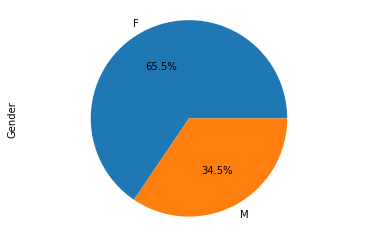

In [15]:
# visualise male vs female distribution
fig, pie = plt.subplots()
df['Gender'].value_counts(normalize = True).plot(kind='pie', autopct='%1.1f%%')
pie.axis('equal')

In [16]:
# what is the proportion of no-shows
df['No-show'].value_counts(normalize = True)

No     0.797347
Yes    0.202653
Name: No-show, dtype: float64

In [17]:
# no. of patients who miss their appointments
len(df[df['No-show'] == 'Yes'].index)

21667

In [18]:
# overall no-show percentage
from __future__ import division
len(df[df['No-show'] == 'Yes'].index) / len(df.index)

0.2026525248557292

So the percent of patients who miss their appointments is about 20%

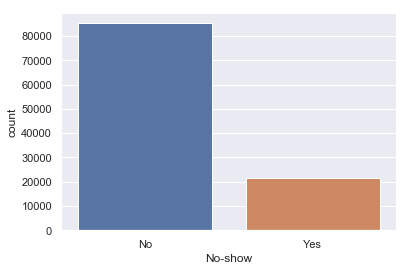

In [17]:
# visualise prcentage of no-shows
sns.countplot(x='No-show', data=df)

Above result shows that the rate of patients who vistit their doctors (about 80%) is more than that of those who miss their appointments.

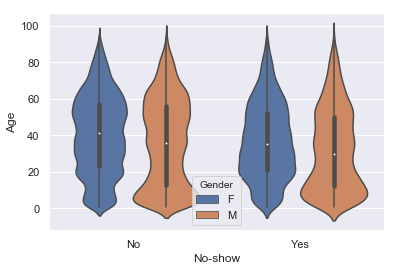

In [18]:
# male vs female age and its effect on showing?
sns.violinplot(df['No-show'], df['Age'], hue=df['Gender'])

In [21]:
# what is the patient age distribution for no-shows versus shows?
df.groupby('No-show')['Age'].mean()

No-show
No     39.036305
Yes    35.290211
Name: Age, dtype: float64

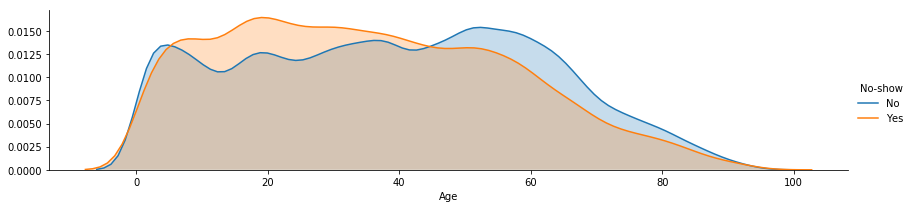

In [22]:
# age distribution for show & no show
# use FacetGrid to plot multiple kdeplots on one plot
fig = sns.FacetGrid(df, hue='No-show', aspect=4)
# call FacetGrid.map() to use sns.kdeplot() to show age distribution
fig.map(sns.kdeplot, 'Age', shade=True)
fig.add_legend()

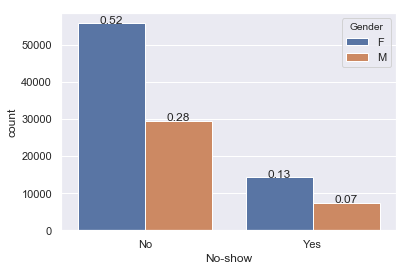

In [19]:
# what is the proportion of missing the appointment whether the patient is male or female?
x = sns.countplot(x='No-show', hue='Gender', data=df)
# to plot the values over the labels
total = float(len(df))
for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha='center')

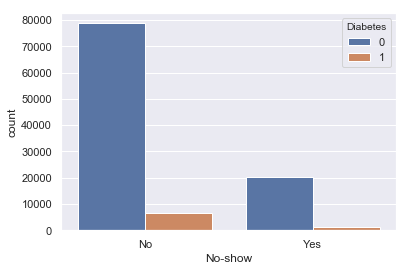

In [20]:
# what is the relationship between no-show and diabetes?
sns.countplot(x='No-show', hue='Diabetes', data=df)

Text(0.5,1,'No-show vs Alcoholism')

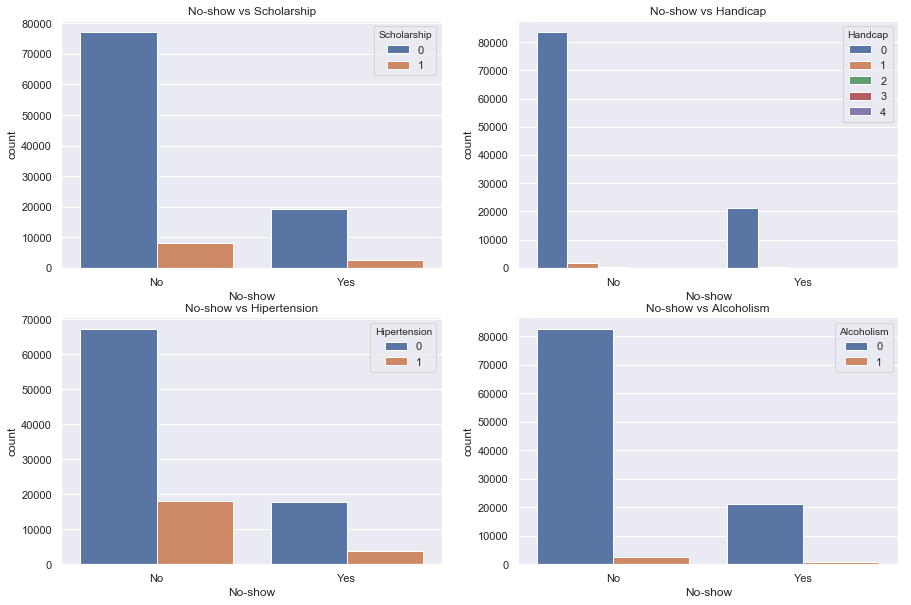

In [21]:
# what is the relationship between no-show and each of scholarship, handicap, hipertension and alcoholism respectively?
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='No-show', hue='Scholarship', data=df, ax=ax[0][0]).set_title('No-show vs Scholarship')
sns.countplot(x='No-show', hue='Handcap', data=df, ax=ax[0][1]).set_title('No-show vs Handicap')
sns.countplot(x='No-show', hue='Hipertension', data=df, ax=ax[1][0]).set_title('No-show vs Hipertension')
sns.countplot(x='No-show', hue='Alcoholism', data=df, ax=ax[1][1]).set_title('No-show vs Alcoholism')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

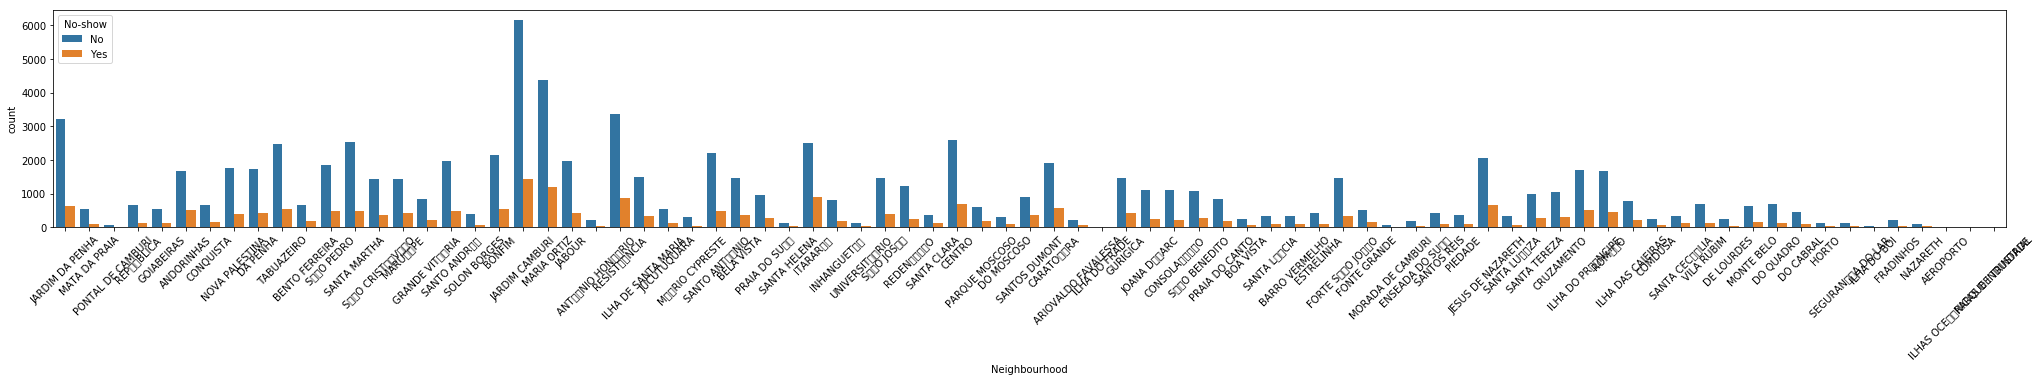

In [26]:
# what is the relationship between neighbourhoods and the number of shows?
plt.figure(figsize=(35,4))
sns.countplot(x='Neighbourhood', hue='No-show', data=df)
plt.xticks(rotation=45)

In [23]:
# which neighbourhoods have the highest number of shows?
shows = df[df['No-show'] == 'No']
shows.groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False).head(20)

Neighbourhood
JARDIM CAMBURI       6149
MARIA ORTIZ          4367
RESISTÊNCIA          3360
JARDIM DA PENHA      3220
CENTRO               2586
SANTA MARTHA         2547
ITARARÉ              2514
TABUAZEIRO           2465
SANTO ANTÔNIO        2195
BONFIM               2161
JESUS DE NAZARETH    2043
SANTO ANDRÉ          1971
JABOUR               1963
CARATOÍRA            1902
SÃO PEDRO            1848
NOVA PALESTINA       1763
DA PENHA             1732
ILHA DO PRÍNCIPE     1697
ANDORINHAS           1685
ROMÃO                1660
Name: No-show, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 <a list of 80 Text xticklabel objects>)

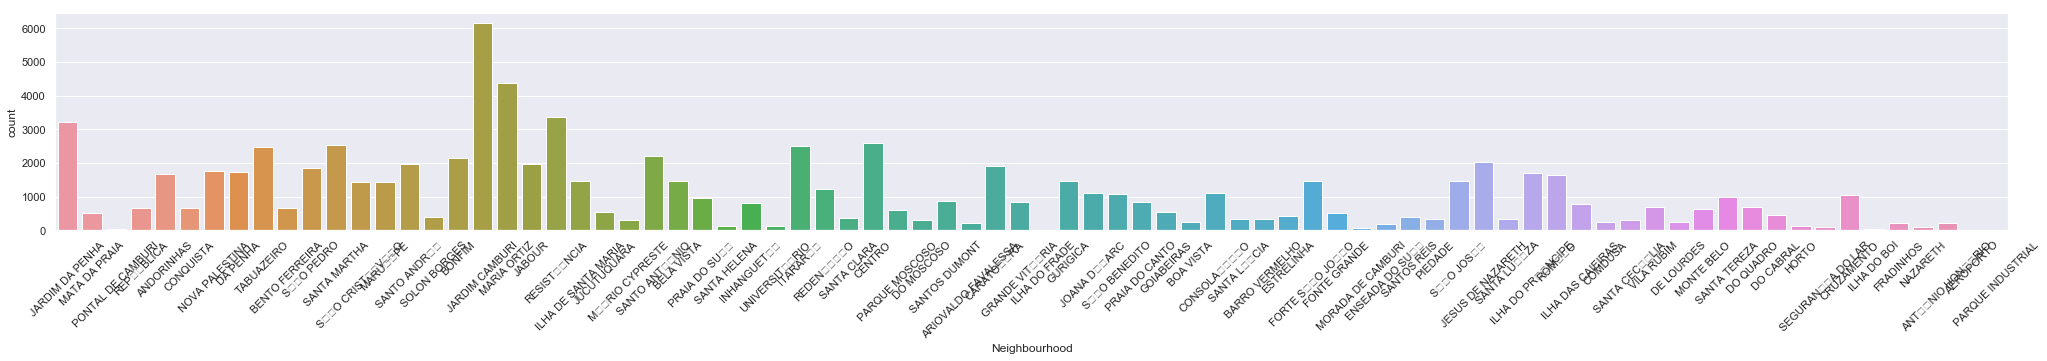

In [24]:
# visualise neighbourhoods vs shows
plt.figure(figsize=(35,4))
sns.countplot(x='Neighbourhood', data=shows)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

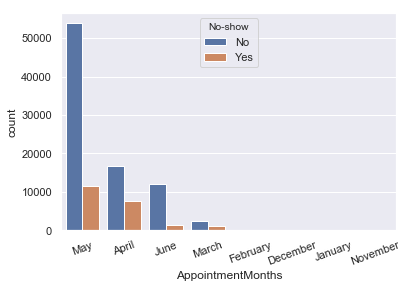

In [25]:
# in which month most patients miss their appointments
# monthly No Show Count
# Proportion of patients visit per month
sns.countplot(x='AppointmentMonths', hue='No-show', data=df, order = df['AppointmentMonths'].value_counts().index)
plt.xticks(rotation=20)

Appointments are more likely to be missed on the month of May.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

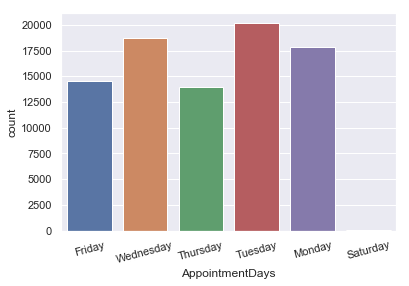

In [26]:
# in which day the patients visit their doctors most frequently?
sns.countplot(x='AppointmentDays', data=visits)
plt.xticks(rotation=15)

In [27]:
# is there specific weekday when most patients miss their appointments?
miss = df[df['No-show'] == 'Yes']
miss.groupby('AppointmentDays')['No-show'].count().sort_values(ascending=False)

AppointmentDays
Tuesday      5116
Wednesday    4755
Monday       4413
Friday       3794
Thursday     3588
Saturday        1
Name: No-show, dtype: int64

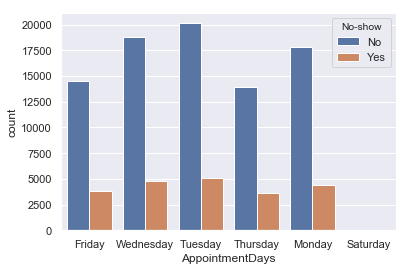

In [28]:
# what is the weekly no-show count
sns.countplot(x='AppointmentDays', hue='No-show', data=df)

Appointments are more likely to be missed on Tuesdays, and less likely on Saturdays..

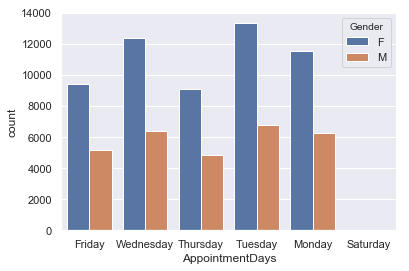

In [29]:
# do men and women visit the doctor on the same days?
sns.countplot(x='AppointmentDays', hue='Gender', data=visits)

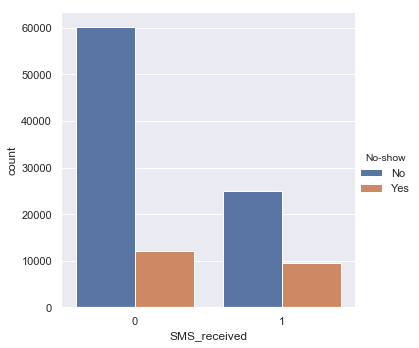

In [30]:
# how likely patients comes to their scheduled appointment if they have received a sms
sns.factorplot('SMS_received', hue='No-show', data=df, kind='count')

It's strange that about 70% of the patients don't receive SMS they don't miss their appointments and has even higher proportion than the ones who have received SMS!

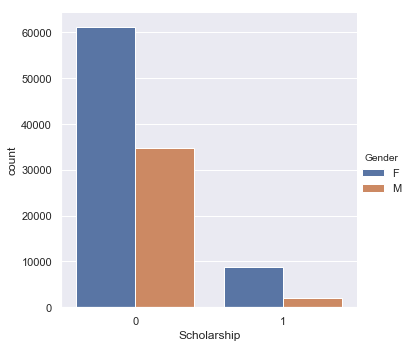

In [31]:
# what is the proportion of patients who has received familia scholarship?
sns.factorplot('Scholarship', hue='Gender', data=df, kind='count')

This shows 1% of patients have received Bolsa Familia Scholarship!

In [32]:
# based on neighbourhood and scholarship, how showing-up is affected?
nbrhd_schlrshp_nshw = pd.DataFrame(df[['Neighbourhood','Scholarship','No-show']].groupby( ['Neighbourhood', 'No-show','Scholarship']).size().reset_index(name = 'Count'))
nbrhd_schlrshp_nshw.head(30)

,Neighbourhood,No-show,Scholarship,Count
0,AEROPORTO,No,0,7
1,AEROPORTO,Yes,0,1
2,ANDORINHAS,No,0,1455
3,ANDORINHAS,No,1,230
4,ANDORINHAS,Yes,0,415
5,ANDORINHAS,Yes,1,91
6,ANTÔNIO HONÓRIO,No,0,202
7,ANTÔNIO HONÓRIO,No,1,9
8,ANTÔNIO HONÓRIO,Yes,0,40
9,ANTÔNIO HONÓRIO,Yes,1,5


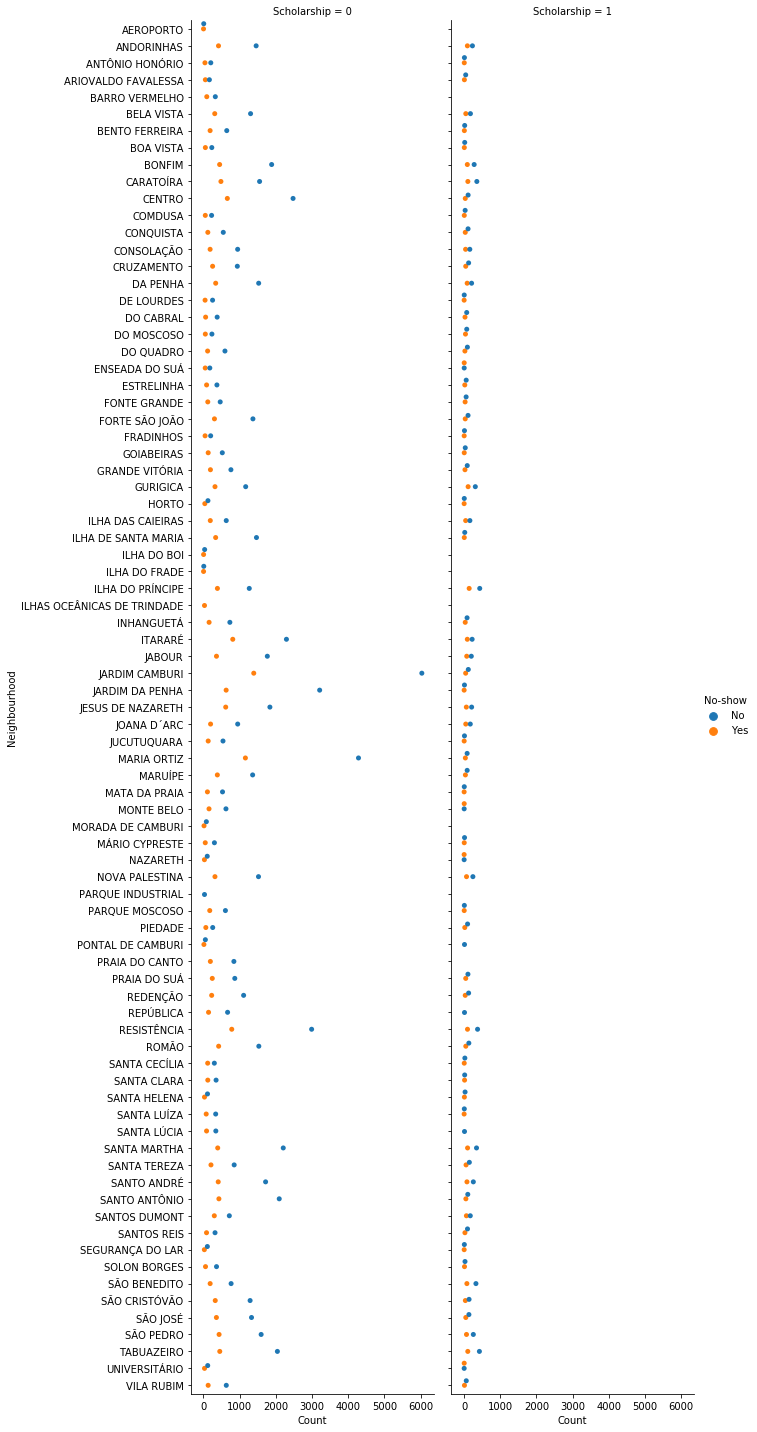

In [37]:
# visualise showing up based on Neighbourhood vs Scholarship
nbrhd_schlrshp_nshw['Neighbourhood'] = nbrhd_schlrshp_nshw['Neighbourhood'].apply(lambda x: x.decode('utf-8'))
sns.factorplot(x = 'Count', y = 'Neighbourhood', hue = 'No-show', data = nbrhd_schlrshp_nshw, col ='Scholarship', kind='swarm', size=20, aspect=0.25)


In [38]:
# which factors can help to predict the showing up of a patient?
# first, let's look at how much each independent variable correlates with No-show (dependent variable)
from IPython import display
df['No-show'] = pd.get_dummies(df['No-show'])
independent_variables = ['SMS_received', 'Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'Handcap']
for variable in independent_variables :
    display.display(df.groupby(variable)['No-show'].mean())

SMS_received
0    0.832714
1    0.723347
Name: No-show, dtype: float64

Scholarship
0    0.801307
1    0.762143
Name: No-show, dtype: float64

Hipertension
0    0.789746
1    0.827092
Name: No-show, dtype: float64

Alcoholism
0    0.797310
1    0.798512
Name: No-show, dtype: float64

Diabetes
0    0.795523
1    0.820118
Name: No-show, dtype: float64

Handcap
0    0.796873
1    0.822310
2    0.796703
3    0.769231
4    0.666667
Name: No-show, dtype: float64

The characteristics that show the highest correlation with showing up for the appointments are sms_received and handicap(4)

***

# Machine Learning

## How to predict whether or not the patient will show up for an appointment?

In order to predict the no-show each analyzed column that has categorical data must be converted to a numerical form; as many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. After transforming the columns that needed changing, the dataset will be split into two subsets:<p>
    __Training set__ — a subset to train a model.<br>
    __Test set__ — a subset to test the trained model.

Logistic Regression, K-Nearest Neighbors and Random Forest will be implemented, in order to determine the effectiveness of the models in no-show prediction, f1-tests will be calculated..

In [39]:
# converting categorical data to numerical data
df['Gender'] = pd.get_dummies(df['Gender'])

le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

le = preprocessing.LabelEncoder()
df['ScheduledDay'] = le.fit_transform(df['ScheduledDay'])

le = preprocessing.LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

le = preprocessing.LabelEncoder()
df['AppointmentDay'] = le.fit_transform(df['AppointmentDay'])

In [40]:
# split data
features = ['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
X = df[features]
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

***

# Logistic Regression Model

In [86]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
lr_conf_mat = confusion_matrix(y_test, lr_y_pred)

Text(0.5,1,'Confusion Matrix')

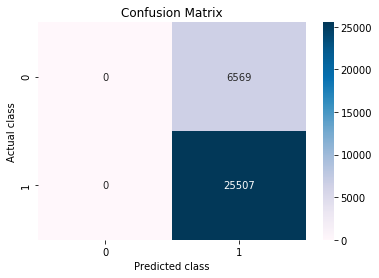

In [87]:
sns.heatmap(lr_conf_mat, cmap='PuBu', annot=True, fmt='d')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [88]:
TN = conf_mat[0][0]
TP = conf_mat[1][1]
accuracy = 100*float(TP+TN)/float(np.sum(lr_conf_mat))
'Accuracy: ' + str(np.round(accuracy, 2)) + '%'

'Accuracy: 79.52%'

***

# K-Nearest Neighbours

In [149]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [150]:
knn_y_pred = classifier.predict(X_test)
knn_conf_mat = confusion_matrix(y_test, knn_y_pred)

Text(0.5,1,'Confusion Matrix')

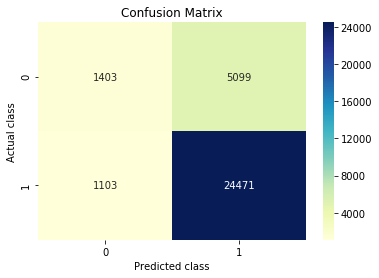

In [152]:
sns.heatmap(knn_conf_mat, cmap='YlGnBu', annot=True, fmt='d')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [103]:
# classification_report(y_test, knn_y_pred)
'Accuracy: ' + str(metrics.accuracy_score(y_test, knn_y_pred))

'Accuracy: 0.7607245292430478'

In [47]:
error = []
# calculating error for K values between 1 and 50
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

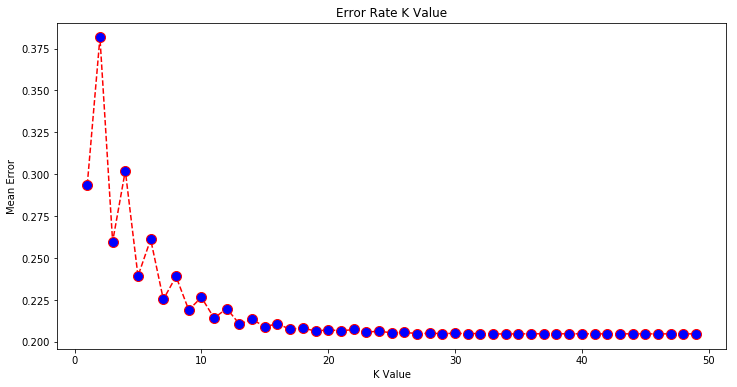

In [48]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

From the output we can see that the mean error is the smallest when the values of k is more than 20

***

# Random Forest Model

In [142]:
rf = RandomForestClassifier(n_estimators = 250, max_depth=100, min_samples_split=50, min_samples_leaf=100, n_jobs = -1)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
rn_conf_mat = confusion_matrix(y_test, rf_y_pred)

Text(0.5,1,'Confusion Matrix')

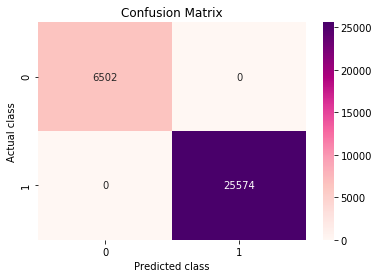

In [143]:
sns.heatmap(rn_conf_mat, cmap='RdPu', annot=True, fmt='d')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [144]:
'Accuracy: ' + str(accuracy_score(y_test, rf_y_pred))

'Accuracy: 1.0'

In [145]:
'F1: ' +  str(f1_score(y_test, rf_y_pred))

'F1: 1.0'